In [1]:
import sys
sys.path.append("../../src/")

import uncertainpy.gradual as grad  

# Higher-order example

In the following, we implement the following Higher-order QBAG.


<div>
<img src="pics/ho_bag_example.png" width="400"/>
</div>

### 1. Create HO-BAG

We can define
- initial weights for arguments, attacks and supports (these can be seen as apriori beliefs when ignoring related arguments). We assume that weights are between 0 (full rejection) and 1 (full acceptance),
- attackers and supporters of arguments, attacks and supports (only arguments can be the sources of attacks and supports).

In [2]:
BAG = grad.BAG()

a_inn = grad.Argument("Innocent", 0.5)
a_gui = grad.Argument("Guilty", 0.5)

a_e1 = grad.Argument("E1", 0.7)
a_e2 = grad.Argument("E2", 0.8)
a_e3 = grad.Argument("E3", 0.4)
a_e4 = grad.Argument("E4", 0.1)
a_e5 = grad.Argument("E5", 0.6)

BAG.add_attack(a_inn, a_gui)
BAG.add_attack(a_gui, a_inn)

BAG.add_support(a_e1, a_inn)
sup_e2_guilty = BAG.add_support(a_e2, a_gui, 0.8)

BAG.add_attack(a_e3, a_e1, 0.6)
BAG.add_attack(a_e4, sup_e2_guilty, 0.7)
BAG.add_attack(a_e5, a_e2)


Att(E5, E2):1->1

### 2. Set up semantics and inference algorithm (approximator)

Gradual semantics compute a final strength (acceptability) value of each argument by
- initializing the strength values with the initial weights,
- updating the strength values based on the strength of attackers and supporters and the initial weight (if the attackers are stronger/weaker than the supporters, the strength should be smaller/larger than the initial weight).

The update process repeats until the strength values converge. 

In [3]:
model = grad.semantics.ContinuousDFQuADModel()
model.BAG = BAG

model.approximator = grad.algorithms.RK4(model)
DELTA = 10e-2
EPSILON = 10e-4
result = model.solve(DELTA, EPSILON, True, True)

ContinuousDFQuADModel, RK4
Time: 9.799999999999981
Arg(Innocent):0.5->0.607
Arg(Guilty):0.5->0.317
Arg(E1):0.7->0.532
Arg(E2):0.8->0.32
Sup(E2, Guilty):0.8->0.744
Arg(E3):0.4->0.4
Arg(E4):0.1->0.1
Arg(E5):0.6->0.6



### 3. Plot evolution of strength values

Only the strength values of arguments and those of relations that are being attacked or supported will be plotted.

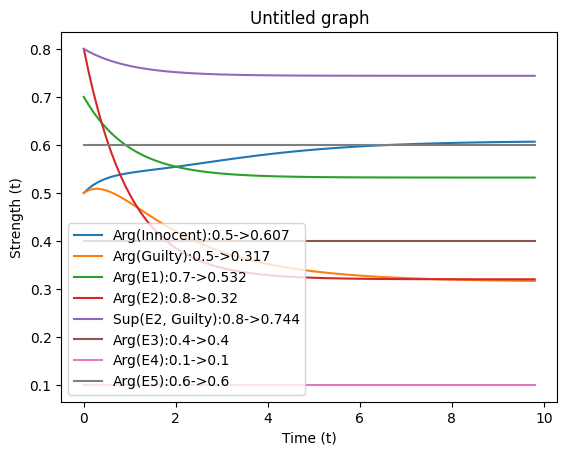

In [4]:
plot = grad.plotting.strengthplot(model, DELTA, EPSILON)
plot.show()

### 4. Compare results under different semantics

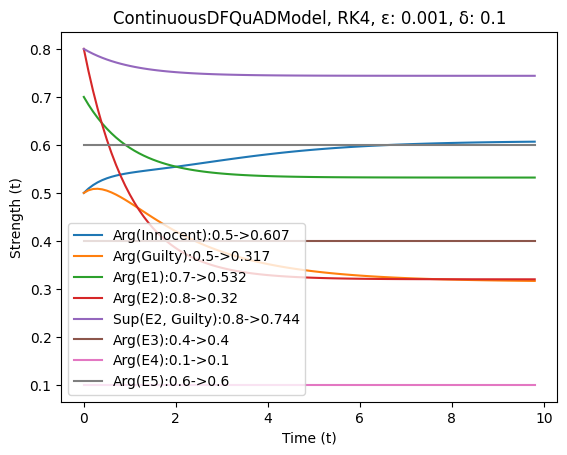

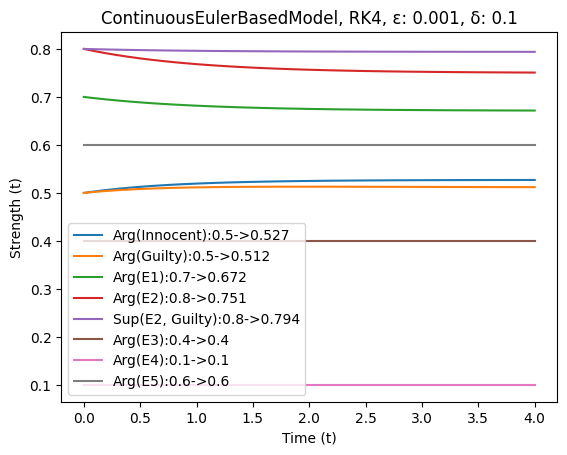

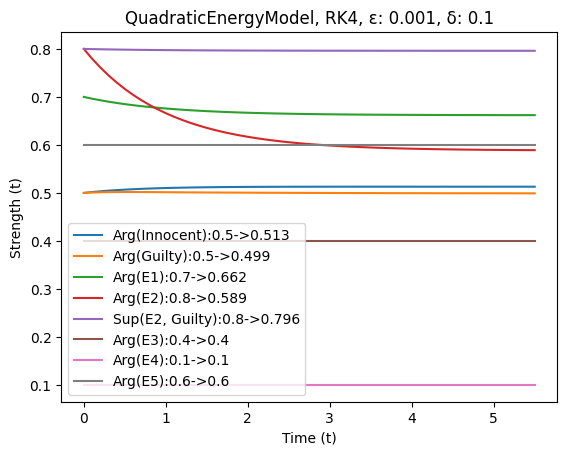

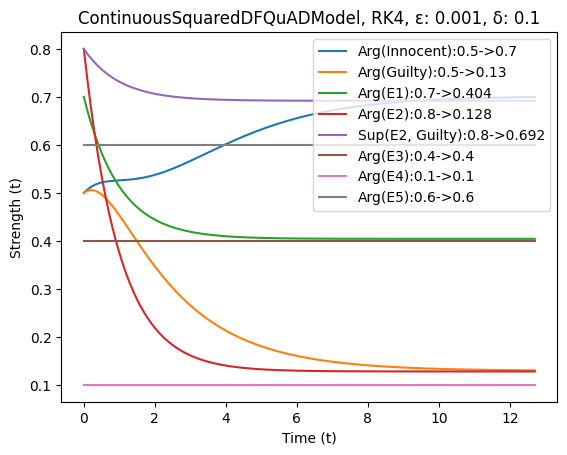

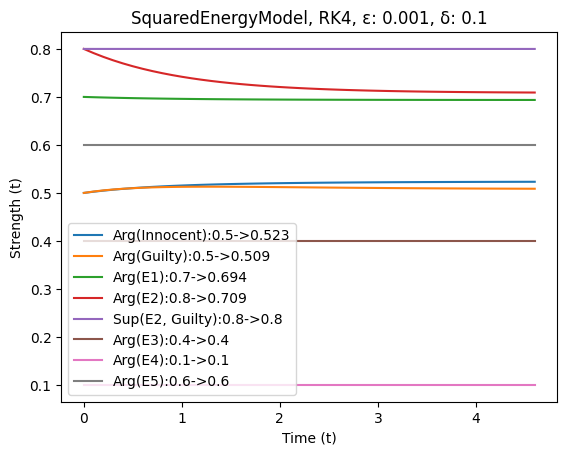

In [5]:
models = []
plots = []

models.append(grad.semantics.ContinuousDFQuADModel())
models.append(grad.semantics.ContinuousEulerBasedModel())
models.append(grad.semantics.QuadraticEnergyModel())
models.append(grad.semantics.ContinuousSquaredDFQuADModel())
models.append(grad.semantics.SquaredEnergyModel())

for model in models:
    BAG.reset_strength_values()
    model.approximator = grad.algorithms.RK4(model)
    model.BAG = BAG

    result = model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
    title = f"{model.name}, {model.approximator}, ε: {EPSILON}, δ: {DELTA}"

    plots.append(grad.plotting.strengthplot(model, DELTA, EPSILON, title))

for plot in plots:
    plot.show()